# Process Mining
Please make sure your notebook fulfills the following requirements:
- Commented and structured code (if not, this will be penalized in the style points)
- Questions separated by markdown headers
- Top-to-bottom runnable cells to reproduce your results
- It should be runnable in the bundled conda environment.
- Ensure that the code in the notebook runs if placed in the same folder as all of the provided
files, delivering the same outputs as the ones you submit in the notebook and report on
in your report.
- DO NOT CLEAR THE OUTPUT of the notebooks you are submitting!

Also, please do not set any random states in this notebook. We set the following random seeds to ensure that the results are the same.

In [1]:
### Display
from IPython.display import display
## Data Handling
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import seaborn as sns

from collections import Counter

In [2]:
# please do not change or delete this cell
random.seed(42)
np.random.seed(42)

## Event Log Exploration
You have received event data of a financing organization's process of offering loans to customers whose application of a loan was accepted. In the event log, every entry describes the state change of an offer,i.e., every entry refers to: 1) the loan application of a customer (case), 2) the state an offer was set to (activity) and 3) a timestamp. Additionally, some additional information is provided for every offer, including the offer ID.

In the provided data, every case describes the process of coming to terms with the customers of accepted loan applications. Hence, every case can include the lifecycles of one or more offers, however, for every case no more than one offer is accepted.
Use Python and PM4PY (https://processintelligence.solutions/static/api/2.7.11/) to explore the event log.

parsing log, completed traces ::   0%|          | 0/11021 [00:00<?, ?it/s]

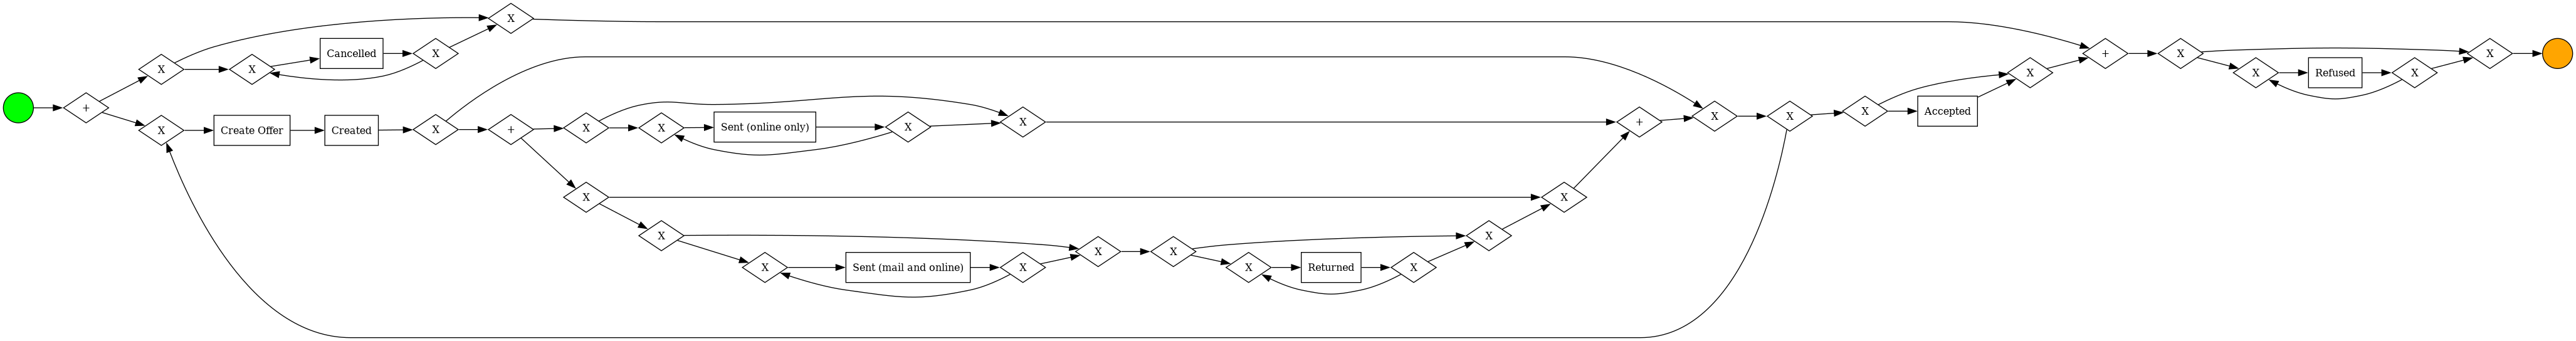

                 concept:name                   time:timestamp  \
0                Create Offer 2016-01-02 14:45:25.611000+00:00   
1                     Created 2016-01-02 14:45:26.830000+00:00   
2      Sent (mail and online) 2016-01-02 14:46:43.295000+00:00   
3                   Cancelled 2016-02-02 07:00:36.975000+00:00   
4                Create Offer 2016-01-02 09:55:46.369000+00:00   
...                       ...                              ...   
68307            Create Offer 2017-01-02 13:34:11.626000+00:00   
68308                 Created 2017-01-02 13:34:12.243000+00:00   
68309  Sent (mail and online) 2017-01-02 13:34:22.594000+00:00   
68310  Sent (mail and online) 2017-01-02 13:34:22.596000+00:00   
68311               Cancelled 2017-01-02 16:05:41.427000+00:00   

       FirstWithdrawalAmount  NumberOfTerms Accepted  MonthlyCost Selected  \
0                        0.0           94.0     True       120.00    False   
1                        NaN            NaN      Na

In [3]:
# Load the event log
data = pm4py.read_xes('process_mining/event_log.xes')
process_model = pm4py.discover_bpmn_inductive(data)
pm4py.view_bpmn(process_model)
print(data)

### Activities and Events
Please leave do not change the activities in the event log -- just leave them as they are in the data. Even if you suspect multiple activity names refer to the same actual activity.

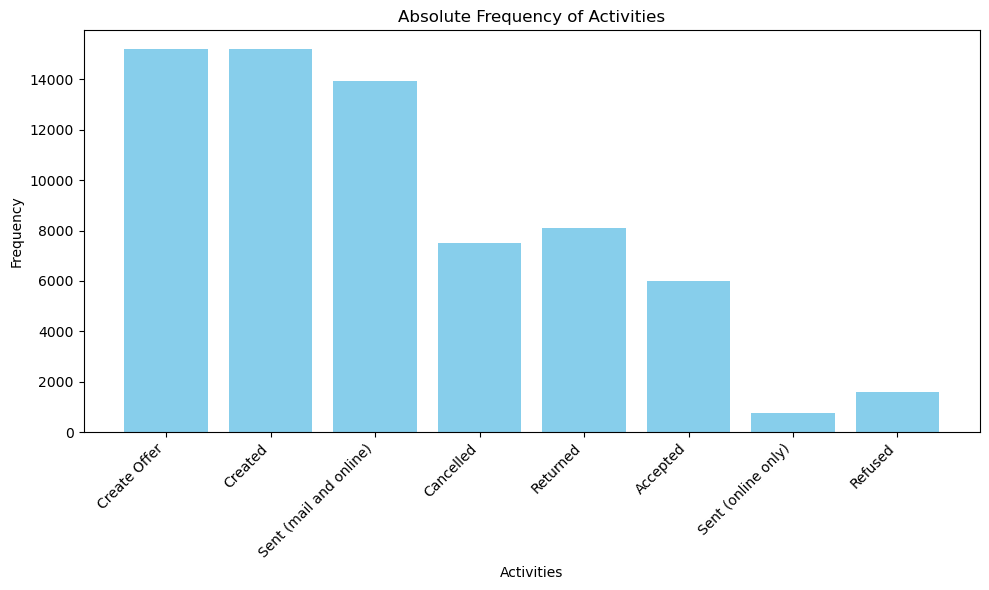

The log consists of several traces, each trace consists of several events and each event has exactly one activity. Therefore, the sum of the frequency of all activities is the number of events. The total number of events is  68312


In [4]:
# number of events and plot showing the frequency of each activity

activities = data["concept:name"]
activityCounts = Counter(activities)

frequencyActivities = dict(activityCounts)

activitiesList = list(frequencyActivities.keys())
frequenciesList = list(frequencyActivities.values())

# plot
fig = plt.figure(figsize=(10, 6))
plt.bar(activitiesList, frequenciesList, color='skyblue')
plt.xlabel('Activities')
plt.ylabel('Frequency')
plt.title('Absolute Frequency of Activities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig.savefig('question3a.png')
print("""The log consists of several traces, each trace consists of several events and each event has exactly one activity. Therefore, the sum of the frequency of all activities is the number of events. The total number of events is """, len(activities))

### Cases and Offers

In [5]:
# number of cases, offers and mean offers per case

# number of cases
cases = data["case:concept:name"]
casesNumber = cases.nunique()
print("The event log has ", casesNumber, "cases")

# number of offers
offers = data["OfferID"].dropna()
offerNumber = offers.nunique()
print("The total number of offers made is: ", offerNumber)

# mean number of offers per case
meanOffersPerCase = data.groupby('case:concept:name')['OfferID'].count().mean()
print("In the mean ", meanOffersPerCase, " offers have been made per case")

The event log has  11021 cases
The total number of offers made is:  15188
In the mean  4.82025224571273  offers have been made per case


## Process Exploration

### Start and End Activities

In [6]:
# start and end activities of the process
startActivities = pm4py.stats.get_start_activities(data)
print("The start activities and there frequency are: ", startActivities)

endActivities = pm4py.stats.get_end_activities(data)
print("The end activities are frequency are: ", endActivities)

The start activities and there frequency are:  {'Create Offer': 11021}
The end activities are frequency are:  {'Cancelled': 5253, 'Accepted': 4442, 'Refused': 1293, 'Returned': 16, 'Sent (mail and online)': 15, 'Sent (online only)': 2}


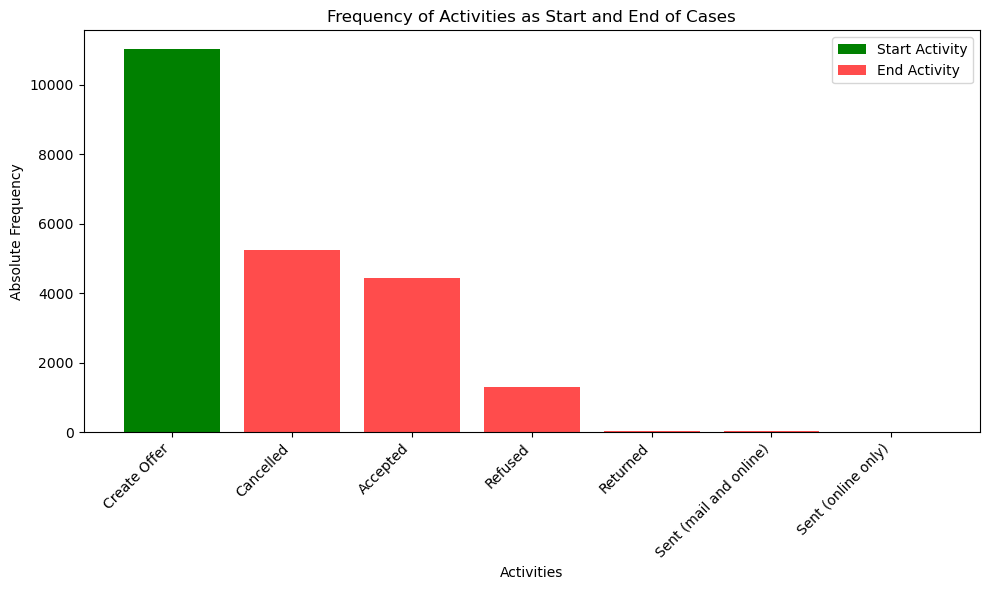

In [7]:
# plot of start and end activities
startActivitiesList = list(startActivities.keys())
startActiviitesFrequencies = list(startActivities.values())


fig = plt.figure(figsize=(10, 6))
plt.bar(list(startActivities.keys()), list(startActivities.values()), color='green', label='Start Activity')
plt.bar(list(endActivities.keys()), list(endActivities.values()), color='red', label='End Activity', alpha=0.7)

plt.xlabel("Activities")
plt.ylabel("Absolute Frequency")
plt.title("Frequency of Activities as Start and End of Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()

fig.savefig('question3c.png')
plt.show()

### Full Process Model

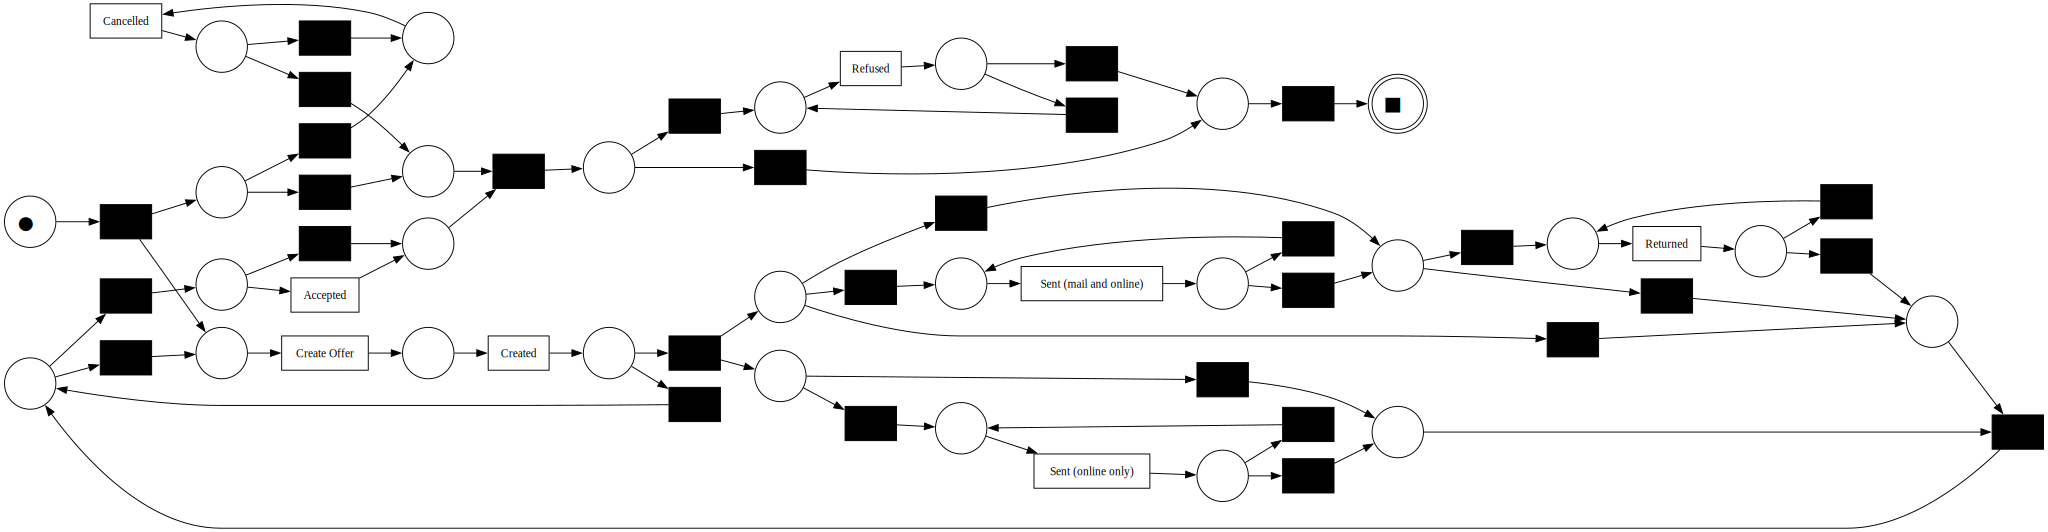

In [8]:
# Process Model full log
petriNet, initialMarking, finalMarking = pm4py.discovery.discover_petri_net_inductive(data)
pm4py.visualization.petri_net.common.visualize.apply(petriNet, initialMarking, finalMarking)

In [9]:
# save petri net
pm4py.save_vis_petri_net(petri_net=petriNet, initial_marking=initialMarking, final_marking=finalMarking, file_path="petri_net_FullProcessModel.png")

''

#### Model Language
(Sensible and Nonsensical Traces)

In [10]:
# in case you want to check something here, but no code required for this part

# subquestion e) 

Initial Marking -> Transition: Create Offer -> Transition: Created -> Transition: Sent(online only) -> Transition: Accepted -> Final Marking

Nameless transitions aren't named for simplicity's sake.

The intended process is described by the given sequence, as a customer only becomes an offer when their loan application is accepted. Once the loan application has been accepted, an offer can be created. This can be done more than once if required. Once an offer has been created, it can be sent (either online or by mail). An offer can then be accepted or declined.

# subquestion f)

A activity sequence that does not make any sense logical and is not within the data is: 

Initial Marking -> Transition: Cancelled -> Transition: Refused -> Final Marking

Nameless transitions aren't named for simplicity's sake.


This action is nonsensical, as an offer cannot be cancelled without first being created. A non-existent offer cannot be rejected either.

Using the inductive miner, the event log is broken down into smaller elements, which are then transformed into the model. During this transformation the behaviour is generalised, which can lead to unlogical traces when looking at the resulting model.

### Variants

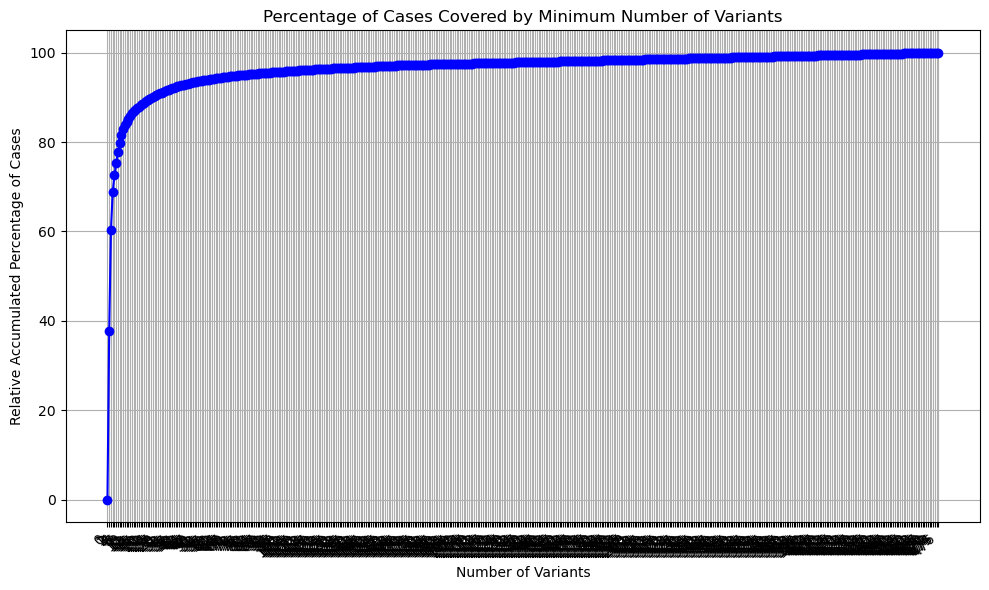

In [11]:
variants = pm4py.stats.get_variants(data)
sortedVariants = sorted(variants.items(), key=lambda x: x[1], reverse=True)
sortedVariants.insert(0, ("TestVariant", 0))  


total_cases = sum(variants.values())  # Total number of cases
cumulative_sum = 0
relative_accumulated_percentages = []

for variant, frequency in sortedVariants:
    cumulative_sum += frequency
    relative_percentage = (cumulative_sum / total_cases) * 100
    relative_accumulated_percentages.append((variant, relative_percentage))


num_variants = [i for i in range(len(sortedVariants))] 
percentages = [percentage for _, percentage in relative_accumulated_percentages]

fig = plt.figure(figsize=(10, 6))
plt.plot(num_variants, percentages, marker='o', linestyle='-', color='b', label='Cumulative Percentage')

plt.title('Percentage of Cases Covered by Minimum Number of Variants')
plt.xlabel('Number of Variants')
plt.ylabel('Relative Accumulated Percentage of Cases')
plt.xticks(num_variants, [f'{i}' if variant is not None else '0th variant' for i, (variant, _) in enumerate(sortedVariants)])
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

fig.savefig('question3g.png')
plt.show()

minimum number of variants you need to cover 85% of cases

In [12]:
minNumberOfVariants = 0
for variant, percentage in  relative_accumulated_percentages:
    minNumberOfVariants += 1
    if percentage > 85:
        print("The number of variants needed to cover 85% of cases is: ", minNumberOfVariants-1)
        break

The number of variants needed to cover 85% of cases is:  12


percentage of cases covered by the 2 most frequent variants

In [13]:
percentagesByFirstTwoVariants = [percentage for _, percentage in relative_accumulated_percentages][3]

print("The percentage of cases covered by the two most frequent variants is: ", percentagesByFirstTwoVariants)

The percentage of cases covered by the two most frequent variants is:  68.7959350331186


number of variants representing fewer than 10 cases

In [14]:
fewerThan10Cases = 0
for variant, frequency in sortedVariants:
    if frequency < 10:
        fewerThan10Cases += 1

print("The number of variants representing fewer than 10 cases are: ", fewerThan10Cases)

The number of variants representing fewer than 10 cases are:  428


## Process Models

### Five Most Frequent Variants

In [15]:
# event log with only 5 most frequent variants
listOfSortedVariants = list(variant[0] for variant in sortedVariants[1:6])
filteredLog = pm4py.filtering.filter_variants(data, listOfSortedVariants)

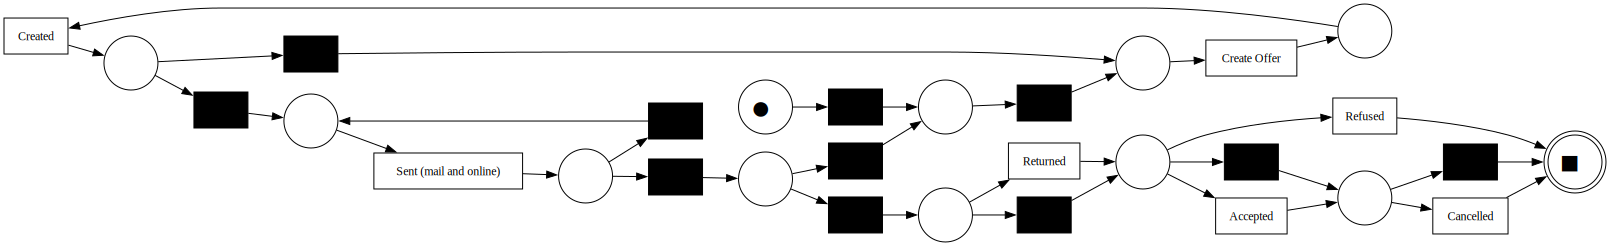

In [16]:
# process model of the five most frequent variants
petriNetFiltered, initialMarkingFiltered, finalMarkingFiltered = pm4py.discovery.discover_petri_net_inductive(filteredLog)
pm4py.visualization.petri_net.common.visualize.apply(petriNetFiltered, initialMarkingFiltered, finalMarkingFiltered)


In [17]:
pm4py.save_vis_petri_net(petri_net=petriNetFiltered, initial_marking=initialMarkingFiltered, final_marking=finalMarkingFiltered, file_path="question3i.png")

''

In [28]:
# fitness of process model
fitness = pm4py.conformance.fitness_token_based_replay(data, petriNetFiltered, initialMarkingFiltered, finalMarkingFiltered)
print("The log_fitness of the full event log is: ", fitness["log_fitness"])

replaying log with TBR, completed traces ::   0%|          | 0/476 [00:00<?, ?it/s]

The log_fitness of the full event log is:  0.9769116889804326


Model fitness per case

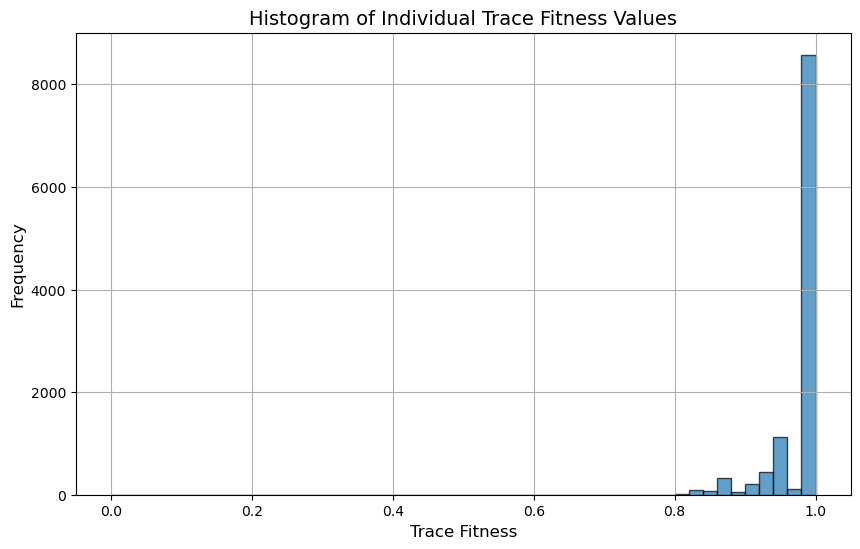

In [19]:
# histogram of model fitness
bins = np.arange(0, 1.02, 0.02)

# add your code here
traceFitness = []
for i in range(1, len(sortedVariants)):
    listOfSortedVariants = list(sortedVariants[i][0])
    filteredLog = pm4py.filtering.filter_variants(data, [tuple(listOfSortedVariants)])
    trace_fitness = pm4py.conformance.fitness_token_based_replay(filteredLog, petriNetFiltered, initialMarkingFiltered, finalMarkingFiltered)['average_trace_fitness']
    for j in range(0, sortedVariants[i][1]):
        traceFitness.append(trace_fitness)

# plot histrogram
fig = plt.figure(figsize=(10, 6))
plt.hist(traceFitness, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Individual Trace Fitness Values', fontsize=14)
plt.xlabel('Trace Fitness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

fig.savefig('question3j.png')
plt.show()


In [20]:
# subquestion k)
print("The percentage of fitting traces is: ", fitness['percentage_of_fitting_traces'], ", hence the statement that the percentage of fitting traces is significantly higher is a bit of a overstatement.")
print("""The fitness of the full event log is: """, fitness['log_fitness'], """. The reason why the fitness of the full event log is higher than the percentage of matching traces is due to the calculation of the fitness of the event log.
When the token-based replay algorithm is used to calculate the fitness of the event log, traces that do not match one hundred percent are also taken into account, resulting in a higher percentage for the full event log.
In contrast, the percentage of matching traces only considers traces that can be fully represented by the Petri net. Traces that only partially match the Petri net are therefore not considered, resulting in a lower percentage of matching traces.""")


{'perc_fit_traces': 77.8332274748208, 'average_trace_fitness': 0.9828988471844935, 'log_fitness': 0.9769116889804326, 'percentage_of_fitting_traces': 77.8332274748208}
The percentage of fitting traces is:  77.8332274748208 , hence the statement that the percentage of fitting traces is significantly higher is a bit of a overstatement.
The fitness of the full event log is:  0.9769116889804326 . The reason why the fitness of the full event log is higher than the percentage of matching traces is due to the calculation of the fitness of the event log.
When the token-based replay algorithm is used to calculate the fitness of the event log, traces that do not match one hundred percent are also taken into account, resulting in a higher percentage for the full event log.
In contrast, the percentage of matching traces only considers traces that can be fully represented by the Petri net. Traces that only partially match the Petri net are therefore not considered, resulting in a lower percentage o

## Performance Analysis (Throughput Times)

- Only consider the 35 most frequent variants
- Throughput time of a case: case duration


In [21]:
# event log with 35 most frequent variants
top35Variants = sortedVariants[1:36]

In [22]:
# determine required information per variant (mean throughput time, number of offers)


variants = []
mean_times = []
number_cases = []

for i in range(1, len(top35Variants)):
    listOfSortedVariants = list(sortedVariants[i][0])
    filteredLog = pm4py.filtering.filter_variants(data, [tuple(listOfSortedVariants)])
    cases =filteredLog["case:concept:name"]
    casesNumber = cases.nunique()
    number_cases.append(casesNumber)
    variants.append(str(tuple(listOfSortedVariants)))

    # mean throughput time
    all_case_durations = pm4py.get_all_case_durations(filteredLog)
    average_case_duration = np.mean(all_case_durations)
    mean_times.append(average_case_duration)

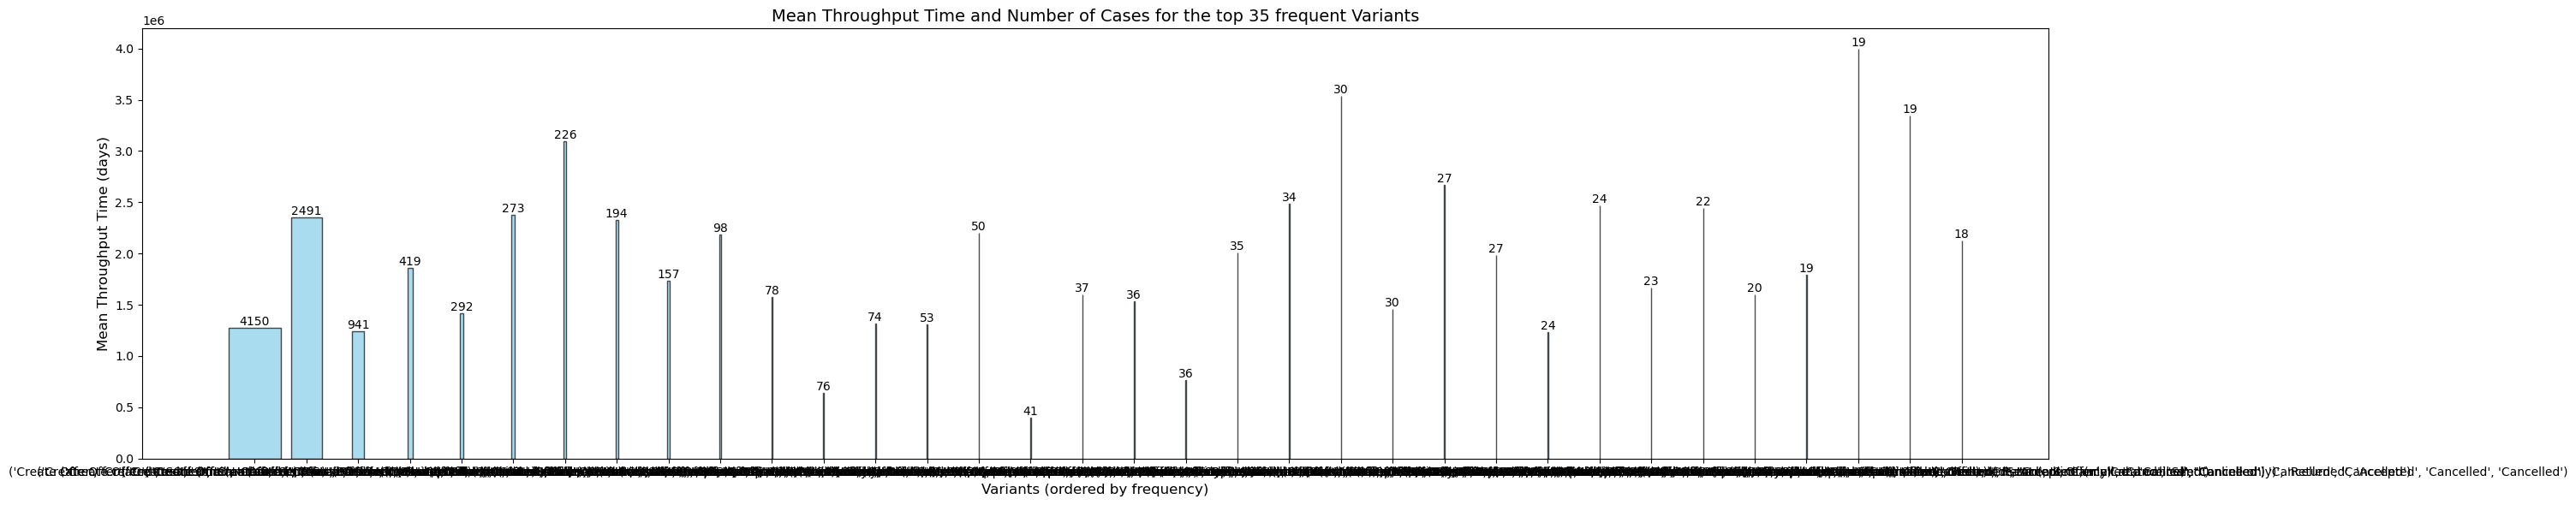

In [23]:
# create bar chart with throughput time per variant.

# Plot
fig = plt.figure(figsize=(30, 6))

# Bar chart
bars = plt.bar(
    variants,  # x-axis labels (variants)
    mean_times,  # y-axis heights (mean throughput time)
    width=[cases / max(number_cases) for cases in number_cases],  # Width proportional to numberCases
    color="skyblue", 
    edgecolor="black", 
    alpha=0.7,
)

for bar, cases in zip(bars, number_cases):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.1, 
        str(cases), 
        ha="center", 
        va="bottom", 
        fontsize=10,
    )

# Labels and title
plt.xlabel("Variants (ordered by frequency)", fontsize=12)
plt.ylabel("Mean Throughput Time (days)", fontsize=12)
plt.title("Mean Throughput Time and Number of Cases for the top 35 frequent Variants", fontsize=14)

# Adjust layout and show
plt.tight_layout()
fig.savefig('question3l.png')
plt.show()

Throughput time and number of offers

In [24]:
offers = []

for i in range(1, len(top35Variants)):
    listOfSortedVariants = list(top35Variants[i][0])
    filteredLog = pm4py.filtering.filter_variants(data, [tuple(listOfSortedVariants)])
    offers.append(filteredLog["OfferID"].dropna().nunique())
print(offers)

dataBoxplot = pd.DataFrame({
    "variant": variants,
    "mean_throughput_time": mean_times,
    "number_of_offers": offers,
})


[2491, 941, 838, 584, 546, 452, 194, 314, 196, 156, 76, 148, 106, 150, 41, 111, 36, 36, 70, 68, 90, 60, 54, 54, 48, 48, 46, 44, 40, 38, 57, 38, 54, 36]


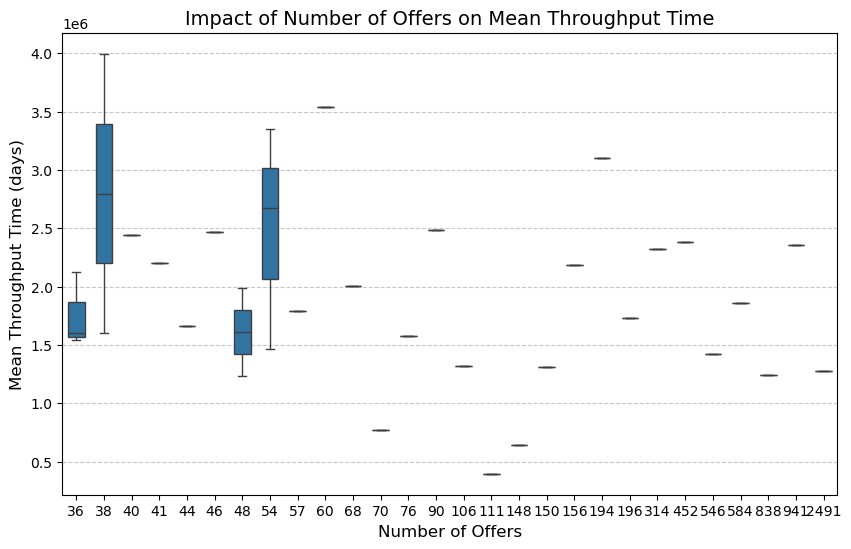

In [25]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(
    x="number_of_offers",
    y="mean_throughput_time",
    data=dataBoxplot,
    width=0.6,
)
plt.title("Impact of Number of Offers on Mean Throughput Time", fontsize=14)
plt.xlabel("Number of Offers", fontsize=12)
plt.ylabel("Mean Throughput Time (days)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
fig.savefig('question3m.png')
plt.show()

In [26]:
print("""The plot does not give a clear indication of how the number of offers presented to a customer affects the throughput time.
However, the throughput time is more variable for a small number of offers than for a large number of offers.
In general, there is no indication as the average throughput time does not increase or decrease with the number of listings.""")

The plot does not give a clear indication of how the number of offers presented to a customer affects the throughput time.
However, the throughput time is more variable for a small number of offers than for a large number of offers.
In general, there is no indication as the average throughput time does not increase or decrease with the number of listings.
